In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

In [32]:
data = pd.read_csv("VLagun_PhysChem_Years4.csv")
X = data.iloc[:, 0:19]
y = data.iloc[:, 19]
features_names = data.columns
data.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,PN,TN/TP,Fe,SiO4Si,DOC,TPOC,Windspeedinsitu,Depth,DINtoDIP,Years
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,0.759,6.848152,0.0121,2.3112,7.500,8.5650,3.5,3.3,17.428571,0
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,1.181,10.127628,0.0136,2.1157,7.860,8.5200,0.0,3.6,10.227273,0
2,3.757624,9.66,18.1,59.0,3.2,22.8,103.4,0.016,0.008,0.582,0.576,9.134467,0.0368,2.2641,8.172,8.4915,1.0,3.4,7.500000,0
3,3.107266,10.36,19.5,46.0,4.3,22.3,92.7,0.026,0.021,0.693,0.689,11.978206,0.0172,2.2623,7.848,8.8320,0.0,2.9,10.930233,0
4,2.619498,11.56,19.0,42.0,11.7,30.3,73.2,0.022,0.048,0.383,1.006,12.664931,0.0237,2.2164,7.536,9.2400,0.0,3.0,5.982906,0


In [33]:
print("Features Shape: ", data.shape)

Features Shape:  (120, 20)


In [34]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [35]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X,y)

importances = rf.feature_importances_

for feature, importance in zip(X.columns, importances):
    np.argsort(importance)
    print(feature, importance)

PSU 0.03190507394162355
O2 0.003582589419099777
temp. 0.07790081454922056
SS 0.08060777055841534
SRP 0.004036798831773258
DOP 0.013983324598623103
PP 0.014702188288849297
NH4N 0.005806634578773869
NO3N 0.008764932070171663
DON 0.007685484481212123
PN 0.014872554391167641
TN/TP 0.014456222928889026
Fe 0.011077016096328418
SiO4Si 0.06806378115215292
DOC 0.21533693442451995
TPOC 0.03414537362623922
Windspeedinsitu 0.3691279556268485
Depth 0.008510685985174741
DINtoDIP 0.01543386445091692


In [39]:
importances - list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X, importances)]

feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse= True)

[print('Variable {:31} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable Windspeedinsitu                 Importance: 0.369
Variable DOC                             Importance: 0.215
Variable SS                              Importance: 0.081
Variable temp.                           Importance: 0.078
Variable SiO4Si                          Importance: 0.068
Variable TPOC                            Importance: 0.034
Variable PSU                             Importance: 0.032
Variable PP                              Importance: 0.015
Variable PN                              Importance: 0.015
Variable DINtoDIP                        Importance: 0.015
Variable DOP                             Importance: 0.014
Variable TN/TP                           Importance: 0.014
Variable Fe                              Importance: 0.011
Variable NO3N                            Importance: 0.009
Variable Depth                           Importance: 0.009
Variable DON                             Importance: 0.008
Variable NH4N                            Importance: 0.0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import ensemble, tree, metrics

In [41]:
estimator_rf = ensemble.RandomForestRegressor(
    n_jobs=-1,
    n_estimators=100,
    random_state=42)

In [42]:
estimator_rf.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [43]:
feature_importance_df = pd.DataFrame(estimator_rf.feature_importances_, index=X.columns.values, columns=['Importance'])
feature_importance_df.all()

Importance    True
dtype: bool

In [44]:
feature_importance_df.sort_values(by='Importance', inplace=True, ascending=False)

<Axes: >

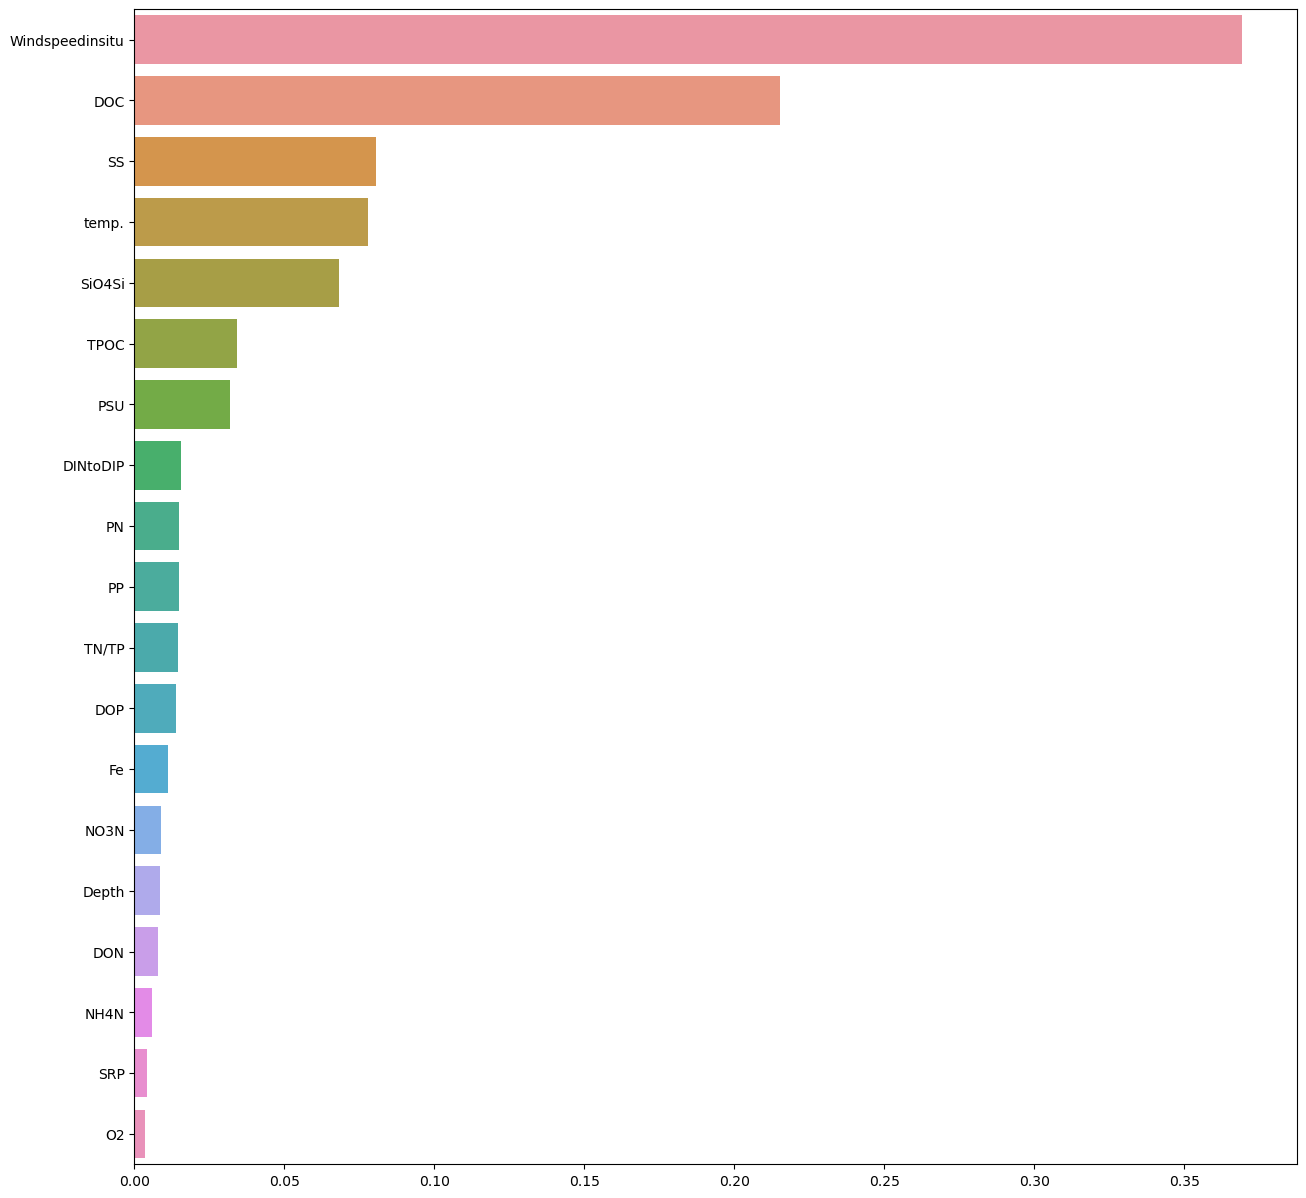

In [45]:
plt.figure(figsize=(15,15))
sns.barplot(data=feature_importance_df, x=feature_importance_df.values.flatten(), y=feature_importance_df.index.values)